In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
from mechanics import *

system = (
    LagrangeSystem()
    .add_coordinate(r'\theta', space=S)
    .add_constant('m g l')
    .define('x y', 'l * sin(theta), - l * cos(theta)')
    .define('T', 'm/2 * (dot(x)**2 + dot(y)**2)')
    .define('U', 'm * g * y')
    .define('L', 'T - U')
    .define('E', 'T + U')
    .euler_lagrange_equation('L')
)
system.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [45]:
from mechanics.integrator import *
system_d = (
    system.discretization()
    .uniform_space('t', 'i', 0, 'N', 'h')
    .apply(RK4('h'))
    .doit()
)
system_d.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Indices: (i,)
Input: (\theta(0,), \dot{\theta}(0,))
Index combinations: ({i: 0}, {i: i}, {i: N})
Input on this combo: {i: 0}, {\dot{\theta}(i,), \theta(i,)}


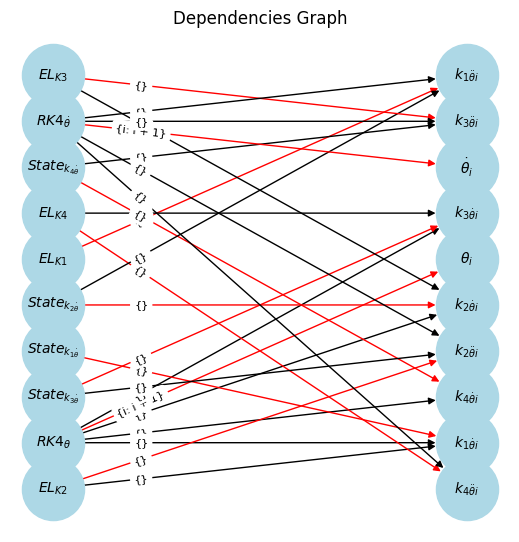

output: {{k_{4\ddot{\theta}}}(i,), {k_{4\dot{\theta}}}(i,), {k_{2\dot{\theta}}}(i,), \dot{\theta}(i + 1,), {k_{1\dot{\theta}}}(i,), \theta(i + 1,), {k_{2\ddot{\theta}}}(i,), {k_{3\dot{\theta}}}(i,), {k_{1\ddot{\theta}}}(i,), {k_{3\ddot{\theta}}}(i,)}


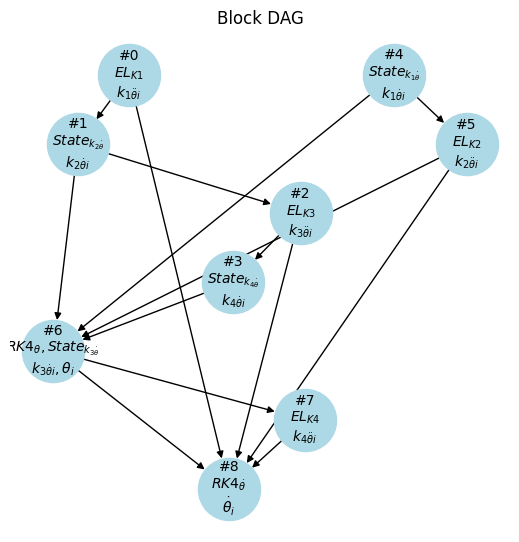

/var/folders/4n/_jcnzrss7571s_0zzmtzqtsr0000gn/T/tmpkstxabno/generated.f90


ld: warning: ignoring duplicate libraries: '-lgfortran'


In [52]:
solver = system_d.solver()

In [53]:
import numpy as np
result = solver.run({
    'l': 1,
    'm': 1,
    'g': 1,
    'N': 1000000,
    'h': 0.1,
    'theta[0]': np.pi/4,
    'dottheta[0]': 0,
})
# result.newton_converged_iters

Condition: {l: 1, m: 1, g: 1, N: 1000000, h: 0.1, \theta(0,): 0.7853981633974483, \dot{\theta}(0,): 0}
 Running solver with condition:    1000000.0000000000       0.10000000000000001        1.0000000000000000        1.0000000000000000        1.0000000000000000       0.78539816339744828        0.0000000000000000     
 Started
 Output in /Users/yuuki.fj/Develop/mechanics/examples/result/20250718_194137/
 Calculating definitions
 Completed


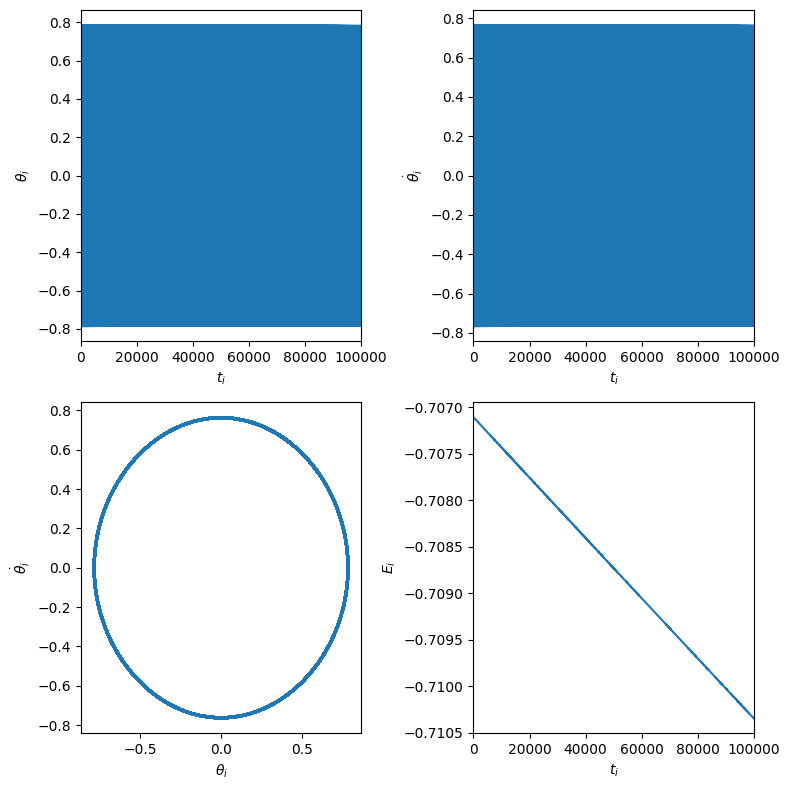

In [54]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(8, 8), layout='tight', subplot_kw={'projection': result})
axes = axes.flatten()

axes[0].plot('theta')
axes[1].plot('dottheta')
axes[2].plot('theta', 'dottheta')
axes[3].plot('E')